# Modeling Notebook

In [301]:
# Import libraries
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import cohen_kappa_score, roc_curve, auc, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [212]:
# Import merged df
merged_df = pd.read_csv('Data\merged_df.csv')

#### Team Abbreviation Input

This will allow the user to type in the 3 letter abbreviation of the team that they would like to model.

In [213]:
# Input team that is on offense
print('Enter your Team as a 3 Letter Abreviation:')
x = input()

Enter your Team as a 3 Letter Abreviation:
PHI


In [214]:
# Locate input team in merged_df and turn it into its own df
final_df = merged_df[(merged_df.posteam == x)]
# Reset Index
final_df.reset_index(drop=True, inplace=True)
final_df

,Year,posteam,defteam,posteam_type,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,...,Def_Fum_Play,Def_Comp_Pct,Def_TD_PA,Def_INT_PA,Def_NY/A,Def_1D_PA,Def_TD_RA,Def_Y/A,Def_1D_RA,Def_Pass_Pct
0,2019,PHI,WAS,1,75.0,654.0,1554.0,3354.0,1,1.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
1,2019,PHI,WAS,1,75.0,648.0,1548.0,3348.0,1,2.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
2,2019,PHI,WAS,1,64.0,617.0,1517.0,3317.0,1,1.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
3,2019,PHI,WAS,1,62.0,575.0,1475.0,3275.0,1,2.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
4,2019,PHI,WAS,1,71.0,539.0,1439.0,3239.0,1,3.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526,2018,PHI,NE,0,11.0,150.0,150.0,150.0,4,2.0,...,0.009980,0.611570,0.047934,0.029752,6.2,0.343802,0.019074,4.9,0.253406,0.622428
3527,2018,PHI,NE,0,11.0,145.0,145.0,145.0,4,3.0,...,0.009980,0.611570,0.047934,0.029752,6.2,0.343802,0.019074,4.9,0.253406,0.622428
3528,2018,PHI,NE,0,31.0,129.0,129.0,129.0,4,1.0,...,0.009980,0.611570,0.047934,0.029752,6.2,0.343802,0.019074,4.9,0.253406,0.622428
3529,2018,PHI,NE,0,29.0,123.0,123.0,123.0,4,2.0,...,0.009980,0.611570,0.047934,0.029752,6.2,0.343802,0.019074,4.9,0.253406,0.622428


#### Turn play_type column into integer values for modeling

In [215]:
# Replace Run/Pass with 0/1
final_df['play_type']=final_df['play_type'].replace({'run': '0', 'pass':'1'}).astype(int)
final_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,posteam,defteam,posteam_type,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,...,Def_Fum_Play,Def_Comp_Pct,Def_TD_PA,Def_INT_PA,Def_NY/A,Def_1D_PA,Def_TD_RA,Def_Y/A,Def_1D_RA,Def_Pass_Pct
0,2019,PHI,WAS,1,75.0,654.0,1554.0,3354.0,1,1.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
1,2019,PHI,WAS,1,75.0,648.0,1548.0,3348.0,1,2.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
2,2019,PHI,WAS,1,64.0,617.0,1517.0,3317.0,1,1.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
3,2019,PHI,WAS,1,62.0,575.0,1475.0,3275.0,1,2.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
4,2019,PHI,WAS,1,71.0,539.0,1439.0,3239.0,1,3.0,...,0.008341,0.687037,0.064815,0.024074,6.5,0.370370,0.028398,4.7,0.243408,0.522749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526,2018,PHI,NE,0,11.0,150.0,150.0,150.0,4,2.0,...,0.009980,0.611570,0.047934,0.029752,6.2,0.343802,0.019074,4.9,0.253406,0.622428
3527,2018,PHI,NE,0,11.0,145.0,145.0,145.0,4,3.0,...,0.009980,0.611570,0.047934,0.029752,6.2,0.343802,0.019074,4.9,0.253406,0.622428
3528,2018,PHI,NE,0,31.0,129.0,129.0,129.0,4,1.0,...,0.009980,0.611570,0.047934,0.029752,6.2,0.343802,0.019074,4.9,0.253406,0.622428
3529,2018,PHI,NE,0,29.0,123.0,123.0,123.0,4,2.0,...,0.009980,0.611570,0.047934,0.029752,6.2,0.343802,0.019074,4.9,0.253406,0.622428


In [216]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3531 entries, 0 to 3530
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       3531 non-null   int64  
 1   posteam                    3531 non-null   object 
 2   defteam                    3531 non-null   object 
 3   posteam_type               3531 non-null   int64  
 4   yardline_100               3531 non-null   float64
 5   quarter_seconds_remaining  3531 non-null   float64
 6   half_seconds_remaining     3531 non-null   float64
 7   game_seconds_remaining     3531 non-null   float64
 8   qtr                        3531 non-null   int64  
 9   down                       3531 non-null   float64
 10  goal_to_go                 3531 non-null   int64  
 11  ydstogo                    3531 non-null   int64  
 12  play_type                  3531 non-null   int32  
 13  score_differential         3531 non-null   float

#### Setup Plot Feature Importance Function

In [217]:
#Feature importance function
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

# Modeling

In [218]:
# Split data into X and y values
y = final_df['play_type']
X = final_df.drop({'play_type', 'posteam', 'defteam', 'Year'}, axis=1)

In [219]:
# Use MinMaxScaler to scale data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,posteam_type,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,...,Def_Fum_Play,Def_Comp_Pct,Def_TD_PA,Def_INT_PA,Def_NY/A,Def_1D_PA,Def_TD_RA,Def_Y/A,Def_1D_RA,Def_Pass_Pct
0,1.0,0.755102,0.726363,0.863257,0.931648,0.0,0.000000,0.0,0.225,0.472222,...,0.42475,0.763631,0.857421,0.393469,0.625,0.802409,0.280383,0.777778,0.662559,0.0
1,1.0,0.755102,0.719689,0.859922,0.929981,0.0,0.333333,0.0,0.225,0.472222,...,0.42475,0.763631,0.857421,0.393469,0.625,0.802409,0.280383,0.777778,0.662559,0.0
2,1.0,0.642857,0.685206,0.842690,0.921367,0.0,0.000000,0.0,0.225,0.472222,...,0.42475,0.763631,0.857421,0.393469,0.625,0.802409,0.280383,0.777778,0.662559,0.0
3,1.0,0.622449,0.638487,0.819344,0.909697,0.0,0.333333,0.0,0.175,0.472222,...,0.42475,0.763631,0.857421,0.393469,0.625,0.802409,0.280383,0.777778,0.662559,0.0
4,1.0,0.714286,0.598443,0.799333,0.899694,0.0,0.666667,0.0,0.400,0.472222,...,0.42475,0.763631,0.857421,0.393469,0.625,0.802409,0.280383,0.777778,0.662559,0.0


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=123)

In [221]:
print(y.value_counts())
smote = SMOTE()
X_train_SMOTE, y_train_SMOTE = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_SMOTE).value_counts())

1    2100
0    1431
Name: play_type, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    1568
0    1568
Name: play_type, dtype: int64


## Random Forest Classifier

In [270]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [271]:
# Test set predictions
pred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[151 200]
 [ 62 470]]
              precision    recall  f1-score   support

           0       0.71      0.43      0.54       351
           1       0.70      0.88      0.78       532

    accuracy                           0.70       883
   macro avg       0.71      0.66      0.66       883
weighted avg       0.70      0.70      0.68       883

Testing Accuracy for Random Forest Classifier: 70.33%


In [280]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [1, 'Vanilla RFC', 70.1, 70.0, 70.0, 44.0,87.0,54.0,78.0]
results_dict = dict(zip(column_names,results))
model_results=pd.DataFrame(results_dict, index = range(1))
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.1,70.0,70.0,44.0,87.0,54.0,78.0


#### Balanced Random Classifier

In [225]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [226]:
# Test set predictions
pred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[194 157]
 [112 420]]
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       351
           1       0.73      0.79      0.76       532

    accuracy                           0.70       883
   macro avg       0.68      0.67      0.67       883
weighted avg       0.69      0.70      0.69       883

Testing Accuracy for Random Forest Classifier: 69.54%


In [281]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [2, 'Balanced RFC', 69.54, 63.0, 73.0, 55.0,79.0,59.0,76.0]
results_dict = dict(zip(column_names,results))
model_results2=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results2)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0


#### SMOTE Random Forest Classifier

In [257]:
# Instantiate and fit a RandomForestClassifier
forest_smote = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest_smote.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [229]:
# Test set predictions
pred = forest_smote.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[247 104]
 [185 347]]
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       351
           1       0.77      0.65      0.71       532

    accuracy                           0.67       883
   macro avg       0.67      0.68      0.67       883
weighted avg       0.69      0.67      0.68       883

Testing Accuracy for Random Forest Classifier: 67.27%


In [282]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [3, 'SMOTE RFC', 67.27,57.0, 77.0, 70.0, 65.0,63.0,71.0]
results_dict = dict(zip(column_names,results))
model_results3=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results3)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0


# XBoost

In [231]:
xgbc_clf = XGBClassifier()
xgbc_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [232]:
# Test set predictions
pred = xgbc_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for XGBoost Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[185 166]
 [129 403]]
              precision    recall  f1-score   support

           0       0.59      0.53      0.56       351
           1       0.71      0.76      0.73       532

    accuracy                           0.67       883
   macro avg       0.65      0.64      0.64       883
weighted avg       0.66      0.67      0.66       883

Testing Accuracy for XGBoost Classifier: 66.59%


In [283]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [4, 'XGBoost', 66.59,59.0, 71.0, 53.0, 76.0,56.0,73.0]
results_dict = dict(zip(column_names,results))
model_results4=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results4)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0


# Gradient Boost

In [234]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.02)

gbr.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [235]:
# Test set predictions
pred = gbr.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Gradient Boosting Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[156 195]
 [ 73 459]]
              precision    recall  f1-score   support

           0       0.68      0.44      0.54       351
           1       0.70      0.86      0.77       532

    accuracy                           0.70       883
   macro avg       0.69      0.65      0.66       883
weighted avg       0.69      0.70      0.68       883

Testing Accuracy for Gradient Boosting Classifier: 69.65%


In [284]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [5, 'Gradient Boost', 69.65,68.0, 70.0, 44.0, 86.0,54.0,77.0]
results_dict = dict(zip(column_names,results))
model_results5=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results5)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0


# LogReg

In [237]:
# Instantiate the model
clf = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
clf.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
# Test set predictions
pred = clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for LogReg Model: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[161 190]
 [ 79 453]]
              precision    recall  f1-score   support

           0       0.67      0.46      0.54       351
           1       0.70      0.85      0.77       532

    accuracy                           0.70       883
   macro avg       0.69      0.66      0.66       883
weighted avg       0.69      0.70      0.68       883

Testing Accuracy for LogReg Model: 69.54%


In [285]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [6, 'Vanilla LogReg', 69.54,67.0, 70.0, 46.0, 85.0,54.0,77.0]
results_dict = dict(zip(column_names,results))
model_results6=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results6)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0


#### Balanced LogReg

In [240]:
# Instantiate the model
clf = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', class_weight='balanced')

# Fit the model
clf.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
# Test set predictions
pred = clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for LogReg Model: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[223 128]
 [145 387]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       351
           1       0.75      0.73      0.74       532

    accuracy                           0.69       883
   macro avg       0.68      0.68      0.68       883
weighted avg       0.69      0.69      0.69       883

Testing Accuracy for LogReg Model: 69.08%


In [286]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [7, 'Balanced LogReg', 69.08,61.0, 75.0, 64.0, 73.0,62.0,74.0]
results_dict = dict(zip(column_names,results))
model_results7=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results7)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0
0,7,Balanced LogReg,69.08,61.0,75.0,64.0,73.0,62.0,74.0


#### SMOTE LogReg

In [243]:
# Instantiate the model
clf = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
clf.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [244]:
# Test set predictions
pred = clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for LogReg Model: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[226 125]
 [153 379]]
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       351
           1       0.75      0.71      0.73       532

    accuracy                           0.69       883
   macro avg       0.67      0.68      0.68       883
weighted avg       0.69      0.69      0.69       883

Testing Accuracy for LogReg Model: 68.52%


In [287]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [8, 'SMOTE LogReg', 68.52,60.0, 75.0, 64.0, 71.0,62.0,73.0]
results_dict = dict(zip(column_names,results))
model_results8=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results8)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0
0,7,Balanced LogReg,69.08,61.0,75.0,64.0,73.0,62.0,74.0
0,8,SMOTE LogReg,68.52,60.0,75.0,64.0,71.0,62.0,73.0


# Decision Tree

In [246]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [247]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Decision Tree Model: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[165 186]
 [ 83 449]]
              precision    recall  f1-score   support

           0       0.67      0.47      0.55       351
           1       0.71      0.84      0.77       532

    accuracy                           0.70       883
   macro avg       0.69      0.66      0.66       883
weighted avg       0.69      0.70      0.68       883

Testing Accuracy for Decision Tree Model: 69.54%


In [288]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [9, 'Decision Tree', 69.54,67.0, 71.0, 47.0, 84.0,55.0,77.0]
results_dict = dict(zip(column_names,results))
model_results9=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results9)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0
0,7,Balanced LogReg,69.08,61.0,75.0,64.0,73.0,62.0,74.0
0,8,SMOTE LogReg,68.52,60.0,75.0,64.0,71.0,62.0,73.0
0,9,Decision Tree,69.54,67.0,71.0,47.0,84.0,55.0,77.0


#  Bagged Tree

In [249]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [250]:
# Test set predictions
pred = bagged_tree.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Bagged Tree Model: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[167 184]
 [ 74 458]]
              precision    recall  f1-score   support

           0       0.69      0.48      0.56       351
           1       0.71      0.86      0.78       532

    accuracy                           0.71       883
   macro avg       0.70      0.67      0.67       883
weighted avg       0.71      0.71      0.69       883

Testing Accuracy for Bagged Tree Model: 70.78%


In [289]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [10, 'Bagged Tree', 70.78,69.0, 71.0, 48.0, 86.0,56.0,78.0]
results_dict = dict(zip(column_names,results))
model_results10=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results10)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0
0,7,Balanced LogReg,69.08,61.0,75.0,64.0,73.0,62.0,74.0
0,8,SMOTE LogReg,68.52,60.0,75.0,64.0,71.0,62.0,73.0
0,9,Decision Tree,69.54,67.0,71.0,47.0,84.0,55.0,77.0
0,10,Bagged Tree,70.78,69.0,71.0,48.0,86.0,56.0,78.0


In [252]:
# Instantiate a GaussianNB
naive_bayes =  GaussianNB()
# Fit to the training data
naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [253]:
# Test set predictions
pred = naive_bayes.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Naive Bayes Model: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[193 158]
 [142 390]]
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       351
           1       0.71      0.73      0.72       532

    accuracy                           0.66       883
   macro avg       0.64      0.64      0.64       883
weighted avg       0.66      0.66      0.66       883

Testing Accuracy for Naive Bayes Model: 66.02%


In [290]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [11, 'Naive Bayes Model', 66.02,58.0, 71.0, 55.0, 73.0,56.0,72.0]
results_dict = dict(zip(column_names,results))
model_results11=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results11)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0
0,7,Balanced LogReg,69.08,61.0,75.0,64.0,73.0,62.0,74.0
0,8,SMOTE LogReg,68.52,60.0,75.0,64.0,71.0,62.0,73.0
0,9,Decision Tree,69.54,67.0,71.0,47.0,84.0,55.0,77.0
0,10,Bagged Tree,70.78,69.0,71.0,48.0,86.0,56.0,78.0


# Model Interpretations

For our model and buisness case, we would like to achieve the highest possible accuracy.  No one play type is more important than the other so the best metric would be the accuracy score. Based off of the models we have ran, the best model was the Bagged Decision Tree.  It had an accuracy of 70.78%.  We will now try to perform actions on this model to increase the accuracy.  The first step is to perform a Gridsearch.

# Bagged Tree Gridsearch

In [194]:
model = BaggingClassifier(DecisionTreeClassifier())
parameters = {'base_estimator__max_depth' : [5, 10, 15, 20, 25],
              'n_estimators' : [50, 100, 200, 500, 1000, 1500]}

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 3)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',


In [198]:
# Test set predictions
pred = grid.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Gridsearch Bag Model: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[171 180]
 [ 73 459]]
              precision    recall  f1-score   support

           0       0.70      0.49      0.57       351
           1       0.72      0.86      0.78       532

    accuracy                           0.71       883
   macro avg       0.71      0.67      0.68       883
weighted avg       0.71      0.71      0.70       883

Testing Accuracy for Gridsearch Bag Model: 71.35%


In [291]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [12, 'GridSearch Bagged Tree', 71.35,70.0, 72.0, 49.0, 86.0,57.0,78.0]
results_dict = dict(zip(column_names,results))
model_results12=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results12)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0
0,7,Balanced LogReg,69.08,61.0,75.0,64.0,73.0,62.0,74.0
0,8,SMOTE LogReg,68.52,60.0,75.0,64.0,71.0,62.0,73.0
0,9,Decision Tree,69.54,67.0,71.0,47.0,84.0,55.0,77.0
0,10,Bagged Tree,70.78,69.0,71.0,48.0,86.0,56.0,78.0


The accuracy for our Bagged Tree model rose to 71.35% after performing a gridsearch on it.  We will now look at the top features in the model and try to run the model using only those features.

#### Top Features Bagged Tree

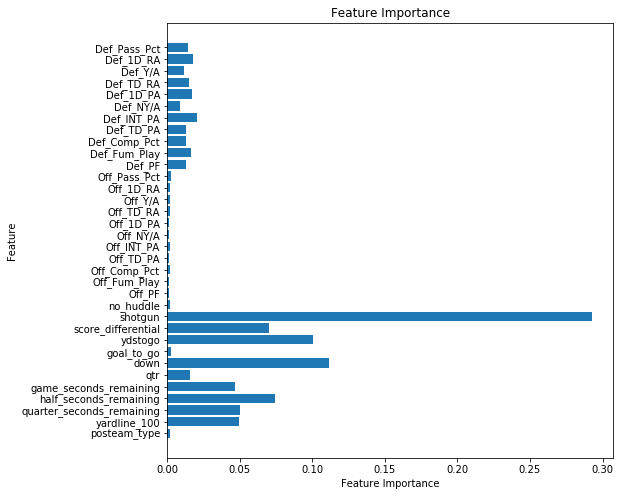

In [272]:
plot_feature_importances(forest)

In [273]:
top_feat = X_scaled[['shotgun', 'score_differential', 'ydstogo', 'down', 'half_seconds_remaining']]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(top_feat, y, test_size = 0.25, random_state=123)

In [274]:
# Instantiate a BaggingClassifier
bagged_tree_top =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)
# Fit to the training data
bagged_tree_top.fit(X_train_top, y_train_top)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [275]:
# Test set predictions
pred = bagged_tree_top.predict(X_test_top)

# Confusion matrix and classification report
print(confusion_matrix(y_test_top, pred))
print(classification_report(y_test_top, pred))
print("Testing Accuracy for Bagged Tree Model: {:.4}%".format(accuracy_score(y_test_top, pred) * 100))

[[168 183]
 [ 73 459]]
              precision    recall  f1-score   support

           0       0.70      0.48      0.57       351
           1       0.71      0.86      0.78       532

    accuracy                           0.71       883
   macro avg       0.71      0.67      0.67       883
weighted avg       0.71      0.71      0.70       883

Testing Accuracy for Bagged Tree Model: 71.01%


In [292]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [13, 'Bagged Tree Top', 71.01,70.0, 71.0, 48.0, 86.0,57.0,78.0]
results_dict = dict(zip(column_names,results))
model_results13=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results13)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0
0,7,Balanced LogReg,69.08,61.0,75.0,64.0,73.0,62.0,74.0
0,8,SMOTE LogReg,68.52,60.0,75.0,64.0,71.0,62.0,73.0
0,9,Decision Tree,69.54,67.0,71.0,47.0,84.0,55.0,77.0
0,10,Bagged Tree,70.78,69.0,71.0,48.0,86.0,56.0,78.0


#### Top Features Gridearch Bagged Tree

In [295]:
model = BaggingClassifier(DecisionTreeClassifier())
parameters = {'base_estimator__max_depth' : [5, 10, 15, 20, 25],
              'n_estimators' : [50, 100, 200, 500, 1000, 1500]}

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 3)
grid.fit(X_train_top, y_train_top)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',


In [296]:
# Test set predictions
pred = grid.predict(X_test_top)

# Confusion matrix and classification report
print(confusion_matrix(y_test_top, pred))
print(classification_report(y_test_top, pred))
print("Testing Accuracy for Gridsearch Bag Model: {:.4}%".format(accuracy_score(y_test_top, pred) * 100))

[[170 181]
 [ 80 452]]
              precision    recall  f1-score   support

           0       0.68      0.48      0.57       351
           1       0.71      0.85      0.78       532

    accuracy                           0.70       883
   macro avg       0.70      0.67      0.67       883
weighted avg       0.70      0.70      0.69       883

Testing Accuracy for Gridsearch Bag Model: 70.44%


In [297]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [14, 'GridSearch Bagged Tree Top', 70.44,68.0, 71.0, 48.0, 85.0,57.0,78.0]
results_dict = dict(zip(column_names,results))
model_results14=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results14)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0
0,7,Balanced LogReg,69.08,61.0,75.0,64.0,73.0,62.0,74.0
0,8,SMOTE LogReg,68.52,60.0,75.0,64.0,71.0,62.0,73.0
0,9,Decision Tree,69.54,67.0,71.0,47.0,84.0,55.0,77.0
0,10,Bagged Tree,70.78,69.0,71.0,48.0,86.0,56.0,78.0


#### Gridsearched Bagged Tree PCA

In [329]:
pca = PCA(.95)
pca.fit_transform(X_train)

array([[ 1.38860053, -0.51051366, -0.47214196, ..., -0.06235824,
         0.38636902, -0.13915894],
       [-0.08218924,  1.05320814, -0.46419427, ...,  0.12910577,
        -0.27474226,  0.35994536],
       [ 1.53414888, -0.43336735, -0.39569233, ...,  0.12340053,
         0.21111297, -0.07246688],
       ...,
       [ 1.43053267, -0.52883818,  0.49645791, ...,  0.10886445,
         0.10181314, -0.09609475],
       [ 1.29299111, -0.56981184,  0.49364228, ..., -0.27523458,
        -0.42134197,  0.0057719 ],
       [ 1.31800064, -0.59031919,  0.42155394, ..., -0.11312675,
        -0.55937405, -0.04675872]])

In [321]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [324]:
# Instantiate a BaggingClassifier
bagged_tree_pca =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=500)
# Fit to the training data
bagged_tree_pca.fit(X_train_pca, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [326]:
# Test set predictions
pred = bagged_tree_pca.predict(X_test_pca)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[144 207]
 [ 69 463]]
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       351
           1       0.69      0.87      0.77       532

    accuracy                           0.69       883
   macro avg       0.68      0.64      0.64       883
weighted avg       0.69      0.69      0.67       883

Testing Accuracy for Random Forest Classifier: 68.74%


In [327]:
column_names = ['model_#', 'model_type', 'test_accuracy', 'run_precision', 
                'pass_precision', 'run_recall', 
                'pass_recall', 'run_f_1', 'pass_f-1']
results = [15, 'GridSearch Bagged Tree PCA', 68.74,68.0, 69.0, 41.0, 87.0,51.0,77.0]
results_dict = dict(zip(column_names,results))
model_results15=pd.DataFrame(results_dict, index = range(1))
model_results=model_results.append(model_results15)
model_results

,model_#,model_type,test_accuracy,run_precision,pass_precision,run_recall,pass_recall,run_f_1,pass_f-1
0,1,Vanilla RFC,70.10,70.0,70.0,44.0,87.0,54.0,78.0
0,2,Balanced RFC,69.54,63.0,73.0,55.0,79.0,59.0,76.0
0,3,SMOTE RFC,67.27,57.0,77.0,70.0,65.0,63.0,71.0
0,4,XGBoost,66.59,59.0,71.0,53.0,76.0,56.0,73.0
0,5,Gradient Boost,69.65,68.0,70.0,44.0,86.0,54.0,77.0
0,6,Vanilla LogReg,69.54,67.0,70.0,46.0,85.0,54.0,77.0
0,7,Balanced LogReg,69.08,61.0,75.0,64.0,73.0,62.0,74.0
0,8,SMOTE LogReg,68.52,60.0,75.0,64.0,71.0,62.0,73.0
0,9,Decision Tree,69.54,67.0,71.0,47.0,84.0,55.0,77.0
0,10,Bagged Tree,70.78,69.0,71.0,48.0,86.0,56.0,78.0


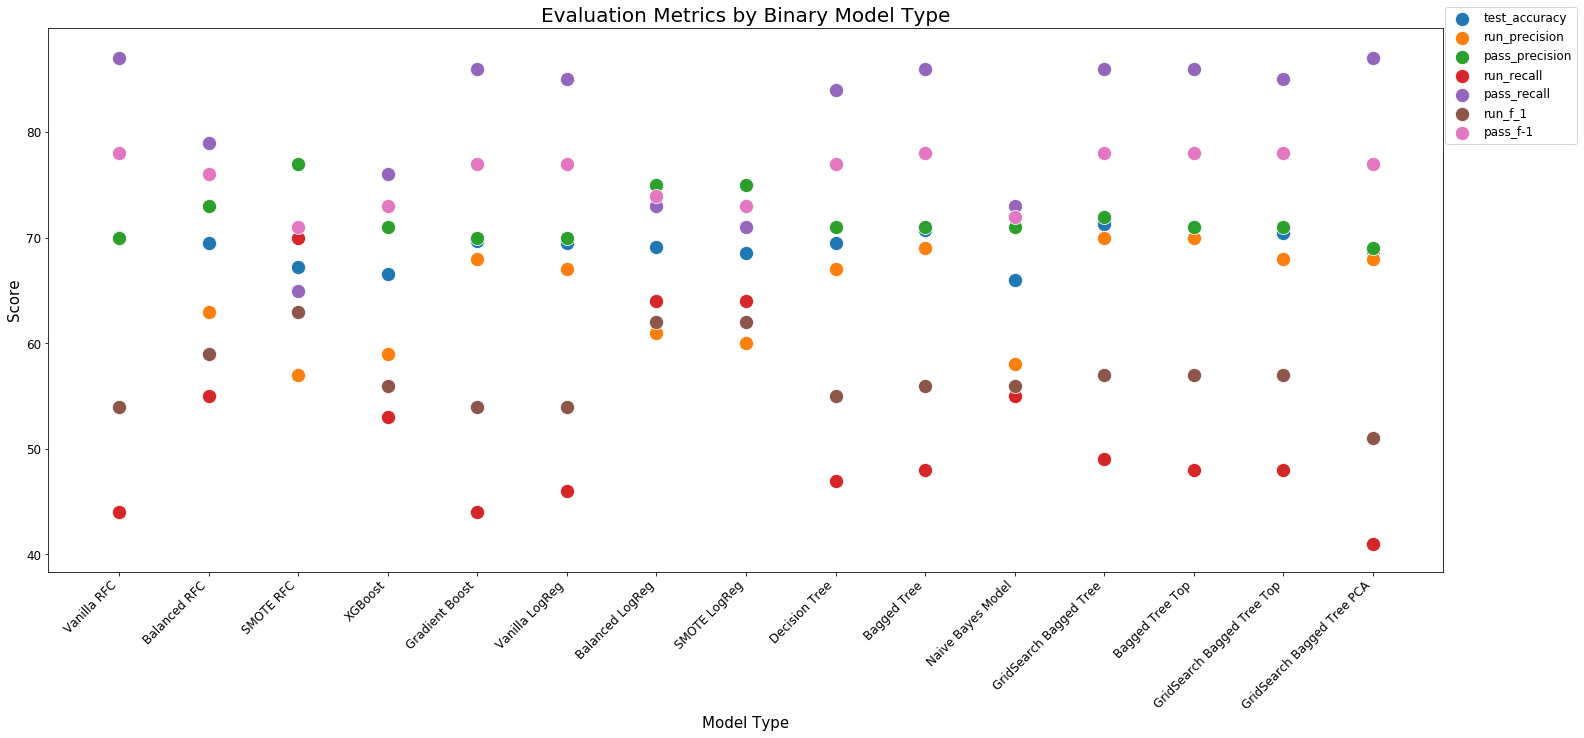

In [331]:
cols_to_plot=model_results.columns[2:9]
plt.figure(figsize=(25,10))
for col in cols_to_plot:
    #used a for loop to plot evaluation metrics data from model_results data frame
    sns.scatterplot(data=model_results, y=col, x='model_type', label = col,s=200)
plt.title('Evaluation Metrics by Binary Model Type',size=20)
plt.xlabel('Model Type',size=15)
plt.ylabel('Score',size = 15)
plt.xticks(size=12, rotation=45, horizontalalignment='right')
plt.yticks(size=12)
plt.legend(fontsize='large', bbox_to_anchor=(1.1, 1.05))
plt.show()

# Using Model on Other Teams

In [303]:
# Replace Run/Pass with 0/1
merged_df['play_type']=merged_df['play_type'].replace({'run': '0', 'pass':'1'}).astype(int)

In [333]:
results = pd.DataFrame(columns =['accuracy'])

for tm in merged_df.posteam.unique():
    
    all_df = merged_df[(merged_df.posteam == tm)]

    target = all_df['play_type']
    features = all_df.drop({'play_type', 'posteam', 'defteam', 'Year'}, axis=1)
    data_train, data_test, target_train, target_test = train_test_split(features, target, 
                                                                    test_size = 0.25, random_state=123)
    
    bt_all = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=500)
    # Fit to the training data
    bt_all.fit(data_train, target_train)
    
    prediction = bt_all.predict(data_test)
    accuracy = accuracy_score(target_test, prediction)
   
    results.loc[tm] = [accuracy]

In [335]:
results

,accuracy
ATL,0.703518
MIN,0.754017
BAL,0.693878
MIA,0.724860
BUF,0.687421
NYJ,0.729050
CIN,0.725627
SEA,0.678436
LV,0.762759
DEN,0.714475


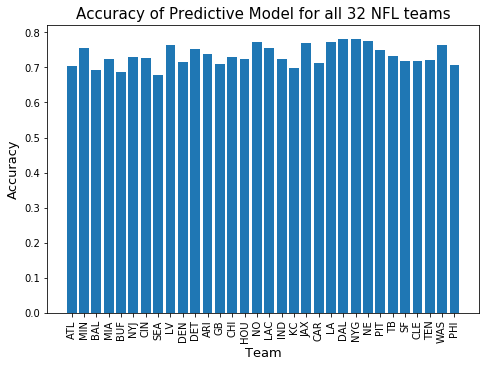

In [338]:
plt.bar(results.index,results.accuracy)
plt.xticks(rotation=90)
plt.xlabel('Team',size=13)
plt.ylabel('Accuracy',size = 13)
plt.title("Accuracy of Predictive Model for all 32 NFL teams", size=15)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Best Model

The best model wound up being the Gridsearched Bagged Decision Tree Model with all features.  Our aim was to get the highest accuracy possible and this was achieved through this model with an accuracy of 71.35%.  When the model was trained on the other 31 teams in the NFL, we were able to achieve the highest accuracy for the NY Giants, with an accuracy of 78.2%.

# Top Features

The top predicitve features in the models were: 
* Shotgun
* ydstogo
* down 
* halftimesecondsremaing
* scoredifferential


# Conclusion

The model at present is tuned for the Eagles, but it wound up having a much higher accuracy score for the NY Giants.  We can furthur improve this accuracy score by specifically hyperparemter tuning the models based on the Giants.  